# **Image denoising using Noise2Void 2D**

---

<font size = 4> Noise2Void 2D is deep-learning method that can be used to denoise 2D microscopy images. By running this notebook, you can train your own network and denoise your images. 
---

<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the Zero-Cost Deep-Learning to Enhance Microscopy project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook is largely based on the paper: **Noise2Void - Learning Denoising from Single Noisy Images**
Alexander Krull, Tim-Oliver Buchholz, Florian Jug
https://arxiv.org/abs/1811.10980

<font size = 4>And source code found in: https://github.com/juglab/n2v



<font size = 4>**Please also cite this original paper when using or developing this notebook.**


# **How to use this notebook?**

---

<font size = 4>Video describing how to use our notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

# **0. Before getting started**
---

<font size = 4>Before you run the notebook, please ensure that you are logged into your Google account and have the training and/or data to process in your Google Drive.

<font size = 4>For Noise2Void to train, it only requires a single noisy image but multiple images can be used. Information on how to generate a training dataset is available in our Wiki page: https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki

<font size = 4>Please note that you currently can **only use .tif files!**

<font size = 4>**We strongly recommend that you generate high signal to noise ration version of your noisy images (Quality control dataset). These images can be used to assess the quality of your trained model**. The quality control assessment can be done directly in this notebook.

<font size = 4> You can also provide a folder that contains the data that you wish to analyse with the trained network once all training has been performed.

<font size = 4>Here is a common data structure that can work:

*   Data
    - **Training dataset**
    - **Quality control dataset** (Optional but recomended)
     - Low SNR images
        - img_1.tif, img_2.tif
      - High SNR images
        - img_1.tif, img_2.tif     
    - **Data to be predicted** 
    - Results


<font size = 4>The **Results** folder will contain the processed images, trained model and network parameters as csv file. Your original images remain unmodified.

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---


# **1. Initialise the Colab session**




---






## **1.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelator: GPU** *(Graphics processing unit)*


In [3]:
#@markdown ##Run this cell to check if you have GPU access

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime settings are correct then Google did not allocate GPU to your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')

from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

/home/baecker/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/baecker/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/baecker/anaconda3/envs/dl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/baecker/anaconda3/envs/dl/lib/python3.6/site-pack

You do not have GPU access.
Did you change your runtime ?
If the runtime settings are correct then Google did not allocate GPU to your session
Expect slow performance. To access GPU try reconnecting later


/home/baecker/anaconda3/envs/dl/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/baecker/anaconda3/envs/dl/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/baecker/anaconda3/envs/dl/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/baecker/anaconda3/envs/dl/li

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5847812956886827607,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4130304463028841849
 physical_device_desc: "device: XLA_CPU device"]

## **1.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [0]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

# **2. Install Noise2Void and Dependencies**
---

In [9]:
#@markdown ##Install Noise2Void and dependencies


# Here we enable Tensorflow 1. 

import tensorflow
print(tensorflow.__version__)
print("Tensorflow enabled.")


# Here we install Noise2Void
!pip install n2v

print("Noise2Void installed.")

# Here we install all libraries and other depencies to run the notebook.

from n2v.models import N2VConfig, N2V
import numpy as np
from csbdeep.utils import plot_history
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from matplotlib import pyplot as plt
import urllib
import os, random
import shutil 
import zipfile
from tifffile import imread, imsave
from csbdeep.io import save_tiff_imagej_compatible

from pathlib import Path
import os, random
import pandas as pd
import csv

from glob import glob

import sys
from scipy import signal
from scipy import ndimage
from skimage import io
from sklearn.linear_model import LinearRegression
from skimage.util import img_as_uint
import matplotlib as mpl
from  skimage.metrics import structural_similarity as ssim_index



!pip install memory_profiler
%load_ext memory_profiler
print("Libraries installed")


1.14.0
Tensorflow enabled.
Noise2Void installed.
     |████████████████████████████████| 449 kB 5.4 MB/s eta 0:00:01
  Created wheel for memory-profiler: filename=memory_profiler-0.57.0-py3-none-any.whl size=28992 sha256=3ac87470ddba9b060a9faa1d92fa781a6b3432274b85f7e1f2ef36b960e5ca25
  Stored in directory: /home/baecker/.cache/pip/wheels/75/72/f3/ea9ac04a4cac6495412f33f260920a97e1eb185cbd3c839880
  Created wheel for psutil: filename=psutil-5.7.0-cp36-cp36m-linux_x86_64.whl size=218914 sha256=8130e612a0cbcf32773db2fe11bc048061bccbed03cb2efaeb7661feabeaabe2
  Stored in directory: /home/baecker/.cache/pip/wheels/a1/d9/f2/b5620c01e9b3e858c6877b1045fda5b115cf7df6490f883382
Successfully built memory-profiler psutil
Libraries installed


# **3. Select your parameters and paths**

---

<font size = 5> **Paths for training, predictions and results**

<font size = 4>**`Training_source:`:** These is the path to your folders containing the Training_source (noisy images). To find the path of the folder containing your datasets, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`model_name`:** Use only my_model -style, not my-model (Use "_" not "-"). Do not use spaces in the name. Do not re-use the name of an existing model (saved in the same folder), otherwise it will be overwritten.

<font size = 4>**`model_path`**: Enter the path where your model will be saved once trained (for instance your result folder).


<font size = 5>**Training Parameters**

<font size = 4>**`number_of_epochs`:** Input how many epochs (rounds) the network will be trained. Preliminary results can already be observed after a few (10-30) epochs, but a full training should run for 100-200 epochs. Evaluate the performance after training (see 4.3.). **Default value: 30**
    
<font size = 4>**`patch_size`:** Noise2Void divides the image into patches for training. Input the size of the patches (length of a side). The value should be between 64 and the dimensions of the image. **Default value: 64**

<font size = 5>**Advanced Parameters - experienced users only**

<font size = 4>**`number_of_steps`:** Define the number of training steps by epoch. By default this parameter is calculated so that each image / patch is seen at least once per epoch. **Default value: Number of patch / batch_size**

<font size =4>**`batch_size:`** This parameter defines the number of patches seen in each training step.  Noise2Void requires a large batch size for stable training. Reduce this parameter if your GPU runs out of memory. **Default value: 128**

<font size = 4>**`percentage_validation`:**  Input the percentage of your training dataset you want to use to validate the network during the training. **Default value: 10** 


Default advanced parameters enabled
Parameters initiated.


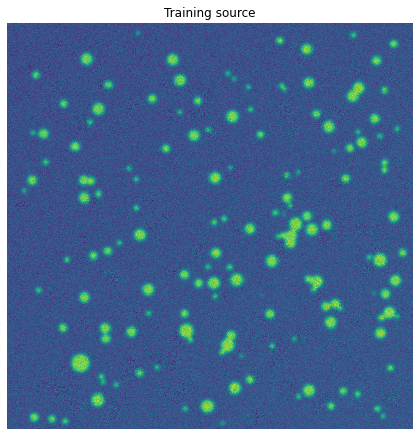

In [15]:
# create DataGenerator-object.

datagen = N2V_DataGenerator()

#@markdown ###Path to training image(s): 
Training_source = "../n2v-data/training" 

#compatibility to easily change the name of the parameters
training_images = Training_source 
imgs = datagen.load_imgs_from_directory(directory = Training_source)

#@markdown ### Model name and path:
model_name = "n2v_synthetic_spots_01" #@param {type:"string"}

model_path = "../models"


#@markdown ###Training Parameters
#@markdown Number of epochs:
number_of_epochs =  30


#@markdown Patch size (pixels)
patch_size =  64

#@markdown ###Advanced Parameters

Use_Default_Advanced_Parameters = True

#@markdown ###If not, please input:
number_of_steps = 100
batch_size =  128
percentage_validation =  10

if (Use_Default_Advanced_Parameters): 
  print("Default advanced parameters enabled")
  # number_of_steps is defined in the following cell in this case
  batch_size = 128
  percentage_validation = 10
 

#here we check that no model with the same name already exist, if so delete
if os.path.exists(model_path+'/'+model_name):
  shutil.rmtree(model_path+'/'+model_name)
  

print("Parameters initiated.")

# This will display a randomly chosen dataset input and output
random_choice = random.choice(os.listdir(Training_source))
x = imread(Training_source+"/"+random_choice)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, interpolation='nearest')
plt.title('Training source')
plt.axis('off');


# **4. Train the network**
---

## **4.1. Prepare the training data and model for training**
---
<font size = 4>Here, we use the information from 3. to build the model and convert the training data into a suitable format for training.

Generated patches: (1152, 64, 64, 1)
Generated patches: (1152, 64, 64, 1)
Generated patches: (1152, 64, 64, 1)
3456 patches created.
345 patch images for validation ( 10 %).
2766 patch images for training.
peak memory: 415.53 MiB, increment: 0.00 MiB
25








Setup done.
N2VConfig(axes='YXC', batch_norm=True, means=['78.94616'], n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5, n2v_patch_shape=(64, 64), n2v_perc_pix=0.198, n_channel_in=1, n_channel_out=1, n_dim=2, probabilistic=False, stds=['21.073261'], train_batch_size=128, train_checkpoint='weights_best.h5', train_epochs=30, train_learning_rate=0.0004, train_loss='mse', train_reduce_lr={'factor': 0.5, 'patience': 10}, train_steps_per_epoch=25, train_tensorboard=True, unet_input_shape=(None, None, 1), unet_kern_size=3, unet_last_activation='linear', unet_n_depth=2, unet_n_first=32, unet_residual=False)


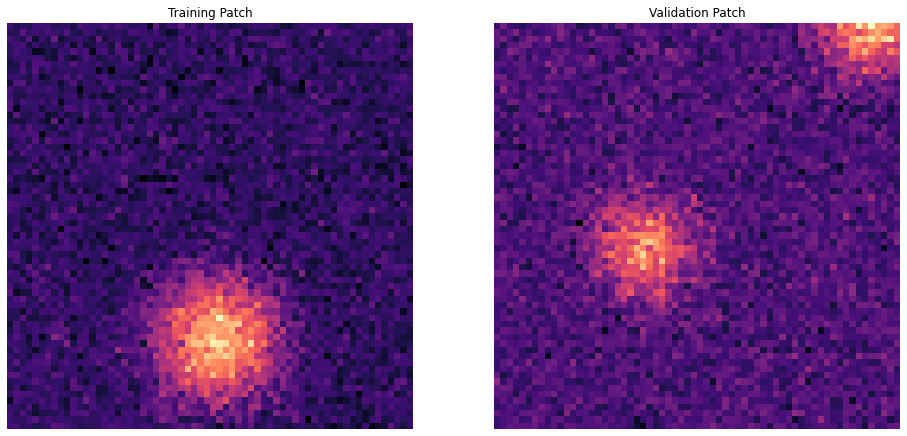

In [16]:
# The code is inspired from the original notebook (https://github.com/juglab/n2v)

#@markdown ##Create the model and dataset objects

#Disable some of the warnings
import warnings
warnings.filterwarnings("ignore")


# split patches from the training images
Xdata = datagen.generate_patches_from_list(imgs, shape=(patch_size,patch_size))
shape_of_Xdata = Xdata.shape
# create a threshold (10 % patches for the validation)
threshold = int(shape_of_Xdata[0]*(percentage_validation/100))
# split the patches into training patches and validation patches
X = Xdata[threshold:]
X_val = Xdata[:threshold]
print(Xdata.shape[0],"patches created.")
print(threshold,"patch images for validation (",percentage_validation,"%).")
print(X.shape[0]-threshold,"patch images for training.")
%memit

#Here we automatically define number_of_step in function of training data and batch size
if (Use_Default_Advanced_Parameters): 
  number_of_steps= int(X.shape[0]/batch_size)+1

print(number_of_steps)

# create a Config object
config = N2VConfig(X, unet_kern_size=3, 
                   train_steps_per_epoch=number_of_steps, train_epochs=number_of_epochs, 
                   train_loss='mse', batch_norm=True, train_batch_size=batch_size, n2v_perc_pix=0.198, 
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5)

# Let's look at the parameters stored in the config-object.
vars(config)
                                 
# the base directory for your model
basedir = model_path             
# create network model.
model = N2V(config, model_name, basedir=basedir)

print("Setup done.")
print(config)


# creates a plot and shows one training patch and one validation patch.
plt.figure(figsize=(16,87))
plt.subplot(1,2,1)
plt.imshow(X[0,...,0], cmap='magma')
plt.axis('off')
plt.title('Training Patch');
plt.subplot(1,2,2)
plt.imshow(X_val[0,...,0], cmap='magma')
plt.axis('off')
plt.title('Validation Patch');

## **4.2. Train the network**
---
<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches. Another way circumvent this is to save the parameters of the model after training and start training again from this point.

In [17]:
import time
start = time.time()

#@markdown ##Start Training
%memit
# The code is from the original notebook (https://github.com/juglab/n2v)
# Play the cell to start training the network.
history = model.train(X, X_val)
print("Training done.")
%memit


print("Training, done.")

# convert the history.history dict to a pandas DataFrame:     
lossData = pd.DataFrame(history.history) 

if os.path.exists(model_path+"/"+model_name+"/Quality Control"):
  shutil.rmtree(model_path+"/"+model_name+"/Quality Control")

os.makedirs(model_path+"/"+model_name+"/Quality Control")

# The training evaluation.csv is saved (overwrites the Files if needed). 
lossDataCSVpath = model_path+'/'+model_name+'/Quality Control/training_evaluation.csv'
with open(lossDataCSVpath, 'w') as f:
  writer = csv.writer(f)
  writer.writerow(['loss','val_loss'])
  for i in range(len(history.history['loss'])):
    writer.writerow([history.history['loss'][i], history.history['val_loss'][i]])


# Displaying the time elapsed for training
dt = time.time() - start
min, sec = divmod(dt, 60) 
hour, min = divmod(min, 60) 
print("Time elapsed:",hour, "hour(s)",min,"min(s)",round(sec),"sec(s)")





peak memory: 426.99 MiB, increment: 0.05 MiB



Preparing validation data:  97%|█████████▋| 336/345 [00:00<00:00, 3353.90it/s]

8 blind-spots will be generated per training patch of size (64, 64).


Preparing validation data: 100%|██████████| 345/345 [00:00<00:00, 3310.54it/s]


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Epoch 1/30
25/25 [==============================] - 89s 4s/step - loss: 1.0641 - n2v_mse: 1.0641 - n2v_abs: 0.7582 - val_loss: 0.7763 - val_n2v_mse: 0.7763 - val_n2v_abs: 0.6250
Epoch 2/30
25/25 [==============================] - 87s 3s/step - loss: 0.3028 - n2v_mse: 0.3028 - n2v_abs: 0.4331 - val_loss: 0.3341 - val_n2v_mse: 0.3341 - val_n2v_abs: 0.4464
Epoch 3/30
25/25 [==============================] - 92s 4s/step - loss: 0.2344 - n2v_mse: 0.2344 - n2v_abs: 0.3770 - val_loss: 0.2707 - val_n2v_mse: 0.2707 - val_n2v_abs: 0.4041
Epoch 4/30
25/25 [==============================] - 90s 4s/step - loss: 0.2150 - n2v_mse: 0.2150 - 

## **4.3. Download your model(s) from Google Drive**
---

<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder as all data can be erased at the next training if using the same folder.

# **5. Evaluate your model**
---

<font size = 4>This section allows the user to perform important quality checks on the validity and generalisability of the trained model. 

<font size = 4>**We highly recommend to perform quality control on all newly trained models.**



In [21]:
# model name and path
#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the name of the model and path to model folder:
#@markdown #####During training, the model files are automatically saved inside a folder named after the parameter 'model_name' (see section 3). Provide the name of this folder as 'QC_model_name' and the path to its parent folder in 'QC_model_path'. 

QC_model_name = "" #@param {type:"string"}
QC_model_path = "" #@param {type:"string"}

if (Use_the_current_trained_model): 
  QC_model_name = model_name
  QC_model_path = model_path

full_QC_model_path = QC_model_path+'/'+QC_model_name+'/'
if os.path.exists(full_QC_model_path):
  print("The "+QC_model_name+" network will be evaluated")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


The n2v_synthetic_spots_01 network will be evaluated


## **5.1. Inspection of the loss function**
---

<font size = 4>It is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

<font size = 4>**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact noise patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

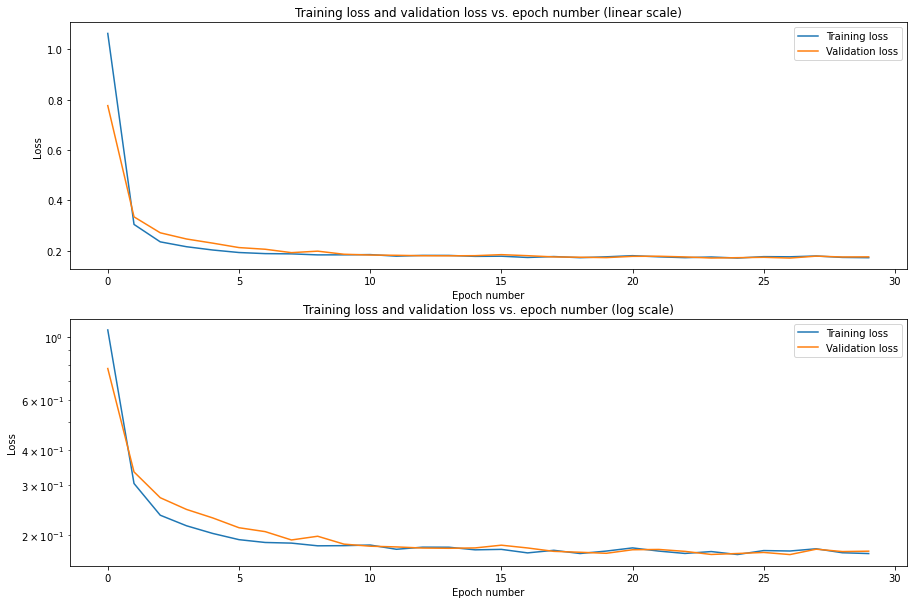

In [22]:
#@markdown ##Play the cell to show a plot of training errors vs. epoch number
import csv
from matplotlib import pyplot as plt

lossDataFromCSV = []
vallossDataFromCSV = []

with open(QC_model_path+'/'+QC_model_name+'/Quality Control/training_evaluation.csv','r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[0]))
        vallossDataFromCSV.append(float(row[1]))

epochNumber = range(len(lossDataFromCSV))
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (linear scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()

plt.subplot(2,1,2)
plt.semilogy(epochNumber,lossDataFromCSV, label='Training loss')
plt.semilogy(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (log scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()
plt.savefig(QC_model_path+'/'+QC_model_name+'/Quality Control/lossCurvePlots.png')
plt.show()



## **5.2. Error mapping and quality metrics estimation (optional)**
---
<font size = 4>This section can only be used if you have generated a **Quality Control Dataset** that can be used to assess the quality of your Noise2VOID model. Here you need a matching pair of low signal to noise ratio (SNR) image (image that you want to denoise) and a high SNR image (ground truth).

<font size = 4>This section will display Square Error maps and SSIM maps as well as calculating NRMSE and SSIM metrics for all the images provided in the "Source_QC_folder" and "Target_QC_folder" !

<font size = 4>**The Square Error map** display the square of the difference between the normalized predicted and target or the source and the target. In this case, a smaller SE is better. A perfect agreement between target and prediction will lead to an image showing zeros everywhere.

<font size = 4>**The SSIM (structural similarity)** is a common metric comparing whether two images contain the same structures. It is a normalized metric and an SSIM of 1 indicates a perfect similarity between two images. Therefore for SSIM, the closer to 1, the better. The SSIM maps calculates the SSIM metric in each pixel by considering the surrounding structural similarity in the neighbourhood of that pixel (currently defined as window of 11 pixels and with Gaussian weighting of 1.5 pixel standard deviation, see our Wiki for more info). 


In [0]:
#@markdown ##Choose the folders that contain your Quality Control dataset


Source_QC_folder = "" #@param{type:"string"}
Target_QC_folder = "" #@param{type:"string"}

# Create a quality control/Prediction Folder
if os.path.exists(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction"):
  shutil.rmtree(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction")

os.makedirs(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction")

# Activate the pretrained model. 
model_training = N2V(config=None, name=QC_model_name, basedir=QC_model_path)


# List Tif images in Source_QC_folder
Source_QC_folder_tif = Source_QC_folder+"/*.tif"
Z = sorted(glob(Source_QC_folder_tif))
Z = list(map(imread,Z))

print('Number of test dataset found in the folder: '+str(len(Z)))


# Perform prediction on all datasets in the Source_QC folder
for filename in os.listdir(Source_QC_folder):
  img = imread(os.path.join(Source_QC_folder, filename))
  predicted = model.predict(img, axes='YX', n_tiles=(2,1))
  os.chdir(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction")
  imsave(filename, predicted)


def gauss(size, sigma):

    """This function is used to create a window for the calculation of ssim, according to Zhou et al.
    """
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

def ssim(img1, img2, cs_map=False):
    """Return the Structural Similarity Map corresponding to input images img1 
    and img2 (images are assumed to be uint8)
    
    Addendum: NOW ASSUMING 16 bits!!!
    
    This function attempts to mimic precisely the functionality of ssim.m a 
    MATLAB provided by the author's of SSIM
    https://ece.uwaterloo.ca/~z70wang/research/ssim/ssim_index.m
    """
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)

    # Currently fixed patch size and sigma size
    size = 11
    sigma = 1.5
    window = gauss(size, sigma)
    K1 = 0.01
    K2 = 0.03
    # L = 255 #bitdepth of image
    L = 65535 #bitdepth of image

    C1 = (K1*L)**2
    C2 = (K2*L)**2
    mu1 = signal.fftconvolve(window, img1, mode='valid')
    mu2 = signal.fftconvolve(window, img2, mode='valid')
    mu1_sq = mu1*mu1
    mu2_sq = mu2*mu2
    mu1_mu2 = mu1*mu2
    sigma1_sq = signal.fftconvolve(window, img1*img1, mode='valid') - mu1_sq
    sigma2_sq = signal.fftconvolve(window, img2*img2, mode='valid') - mu2_sq
    sigma12 = signal.fftconvolve(window, img1*img2, mode='valid') - mu1_mu2
    #if cs_map:
    #    return (((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*
    #                (sigma1_sq + sigma2_sq + C2)), 
    #            (2.0*sigma12 + C2)/(sigma1_sq + sigma2_sq + C2))
    #else:
    return ((2*mu1_mu2 + C1)*(2*sigma12 + C2))/((mu1_sq + mu2_sq + C1)*(sigma1_sq + sigma2_sq + C2))

def normalizeImageWithPercentile(img):
  # Normalisation of the predicted image for conversion to uint8 or 16bits image (necessary for SSIM)
  img_max = np.percentile(img,99.9,interpolation='nearest')
  img_min = np.percentile(img,0.1,interpolation='nearest')
  return (img - img_min)/(img_max - img_min) # For normalisation between 0 and 1.

def clipImageMinAndMax(img, min, max):
  img_clipped = np.where(img > max, max, img) 
  img_clipped = np.where(img_clipped < min, min, img_clipped)
  return img_clipped

def normalizeByLinearRegression(img1, img2):
  # Perform the fit
  linreg = LinearRegression().fit(np.reshape(img1.flatten(),(-1,1)), np.reshape(img2.flatten(), (-1,1)))

  # Get parameters of the regression fit.
  alpha = linreg.coef_
  beta = linreg.intercept_
  # print('alpha: '+str(alpha))
  # print('beta: '+str(beta))

  return img1*alpha + beta

def ssim_index(img1,img2):
  # This function calculates a SSIM index between two images. 
  # Note that the images need be suitably normalised as below.

  img1 = img1.astype(np.float64)
  img2 = img2.astype(np.float64)

  L = 65535
  c1 = (0.01*L)**2
  c2 = (0.03*L)**2
  
  #Mean of the images
  mu_img1 = np.mean(img1)
  mu_img2 = np.mean(img2)
  
  #Variance of the images
  var_img1 = np.mean(np.square(img1-mu_img1))
  var_img2 = np.mean(np.square(img2-mu_img2))
  
  #Covariance of the images
  cov_img1vsimg2 = np.mean((img1-mu_img1)*(img2-mu_img2))

  Numerator = (2*mu_img1*mu_img2+c1)*(2*cov_img1vsimg2+c2)
  Denominator = (mu_img1**2+mu_img2**2+c1)*(var_img1+var_img2+c2)

  SSIM_index = Numerator/Denominator

  return SSIM_index

# Open and create the csv file that will contain all the QC metrics
with open(QC_model_path+"/"+QC_model_name+"/Quality Control/QC_metrics_"+QC_model_name+".csv", "w", newline='') as file:
    writer = csv.writer(file)

    # Write the header in the csv file
    writer.writerow(["image #","Prediction v. GT mSSIM","Input v. GT mSSIM", "Prediction v. GT NRMSE", "Input v. GT NRMSE"])  

    # Let's loop through the provided dataset in the QC folders
    for i in os.listdir(Source_QC_folder):
      if not os.path.isdir(os.path.join(Source_QC_folder,i)):
        print('Running QC on: '+i)
      # -------------------------------- Target test data (Ground truth) --------------------------------
        test_GT = io.imread(os.path.join(Target_QC_folder, i))
        test_GT_norm = normalizeImageWithPercentile(test_GT) # For normalisation between 0 and 1.

      # -------------------------------- Source test data --------------------------------
        test_source = io.imread(os.path.join(Source_QC_folder,i))
        test_source_norm = normalizeImageWithPercentile(test_source) # For normalisation between 0 and 1.
      # Normalize the image further via linear regression wrt the normalised GT image
        test_source_norm = normalizeByLinearRegression(test_source_norm, test_GT_norm)

      # -------------------------------- Prediction --------------------------------
        test_prediction = io.imread(os.path.join(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction",i))
        test_prediction_norm = normalizeImageWithPercentile(test_prediction) # For normalisation between 0 and 1.
      # Normalize the image further via linear regression wrt the normalised GT image
        test_prediction_norm = normalizeByLinearRegression(test_prediction_norm, test_GT_norm)


      # -------------------------------- Calculate the metric maps and save them --------------------------------

      # Calculate the SSIM images based on the default window parameters defined in the function
        GTforSSIM = img_as_uint(clipImageMinAndMax(test_GT_norm,0, 1), force_copy = True)
        PredictionForSSIM = img_as_uint(clipImageMinAndMax(test_prediction_norm,0, 1), force_copy = True)
        SourceForSSIM = img_as_uint(clipImageMinAndMax(test_source_norm,0, 1), force_copy = True)

      # Calculate the SSIM maps
        img_SSIM_GTvsPrediction = ssim(GTforSSIM, PredictionForSSIM)
        img_SSIM_GTvsSource = ssim(GTforSSIM, SourceForSSIM)

      #Save ssim_maps
        img_SSIM_GTvsPrediction_32bit=np.float32(img_SSIM_GTvsPrediction)
        io.imsave(QC_model_path+'/'+QC_model_name+'/Quality Control/SSIM_GTvsPrediction_'+i,img_SSIM_GTvsPrediction_32bit)
        img_SSIM_GTvsSource_32bit=np.float32(img_SSIM_GTvsSource)
        io.imsave(QC_model_path+'/'+QC_model_name+'/Quality Control/SSIM_GTvsSource_'+i,img_SSIM_GTvsSource_32bit)
      
      # Calculate the Root Squared Error (RSE) maps
        img_RSE_GTvsPrediction = np.sqrt(np.square(test_GT_norm - test_prediction_norm))
        img_RSE_GTvsSource = np.sqrt(np.square(test_GT_norm - test_source_norm))

      # Save SE maps
        img_RSE_GTvsPrediction_32bit = np.float32(img_RSE_GTvsPrediction)
        img_RSE_GTvsSource_32bit = np.float32(img_RSE_GTvsSource)
        io.imsave(QC_model_path+'/'+QC_model_name+'/Quality Control/RSE_GTvsPrediction_'+i,img_RSE_GTvsPrediction_32bit)
        io.imsave(QC_model_path+'/'+QC_model_name+'/Quality Control/RSE_GTvsSource_'+i,img_RSE_GTvsSource_32bit)

      ######### SAVE THE METRIC MAPS HERE #########

      # -------------------------------- Calculate the metrics and save them --------------------------------

      # Calculate the mean SSIM metric
      #SSIM_GTvsPrediction_metrics = np.mean(img_SSIM_GTvsPrediction) # THIS IS WRONG, please compute the SSIM over the whole image and not in patches.
      #SSIM_GTvsSource_metrics = np.mean(img_SSIM_GTvsSource) # THIS IS WRONG, please compute the SSIM over the whole image and not in patches.
        index_SSIM_GTvsPrediction = ssim_index(GTforSSIM, PredictionForSSIM)
        index_SSIM_GTvsSource = ssim_index(GTforSSIM, SourceForSSIM)

      # Normalised Root Mean Squared Error (here it's valid to take the mean of the image)
        NRMSE_GTvsPrediction = np.sqrt(np.mean(img_RSE_GTvsPrediction))
        NRMSE_GTvsSource = np.sqrt(np.mean(img_RSE_GTvsSource))

        writer.writerow([i,str(index_SSIM_GTvsPrediction),str(index_SSIM_GTvsSource),str(NRMSE_GTvsPrediction),str(NRMSE_GTvsSource)])



# All data is now processed saved
Test_FileList = os.listdir(Source_QC_folder) # this assumes, as it should, that both source and target are named the same

plt.figure(figsize=(15,15))
# Currently only displays the last computed set, from memory
# Target (Ground-truth)
plt.subplot(3,3,1)
plt.axis('off')
img_GT = io.imread(os.path.join(Target_QC_folder, Test_FileList[-1]))
plt.imshow(img_GT)
plt.title('Target')

# Source
plt.subplot(3,3,2)
plt.axis('off')
img_Source = io.imread(os.path.join(Source_QC_folder, Test_FileList[-1]))
plt.imshow(img_Source)
plt.title('Source')

#Prediction
plt.subplot(3,3,3)
plt.axis('off')
img_Prediction = io.imread(os.path.join(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction/", Test_FileList[-1]))
plt.imshow(img_Prediction)
plt.title('Prediction')

#Setting up colours
cmap = plt.cm.CMRmap

#SSIM between GT and Source
plt.subplot(3,3,5)
plt.axis('off')
imSSIM_GTvsSource = plt.imshow(img_SSIM_GTvsSource, cmap = cmap, vmin=0, vmax=1)
plt.colorbar(imSSIM_GTvsSource,fraction=0.046, pad=0.04)
plt.title('Target vs. Source SSIM: '+str(round(index_SSIM_GTvsSource,3)))

#SSIM between GT and Prediction
plt.subplot(3,3,6)
plt.axis('off')
imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction, cmap = cmap, vmin=0,vmax=1)
plt.colorbar(imSSIM_GTvsPrediction,fraction=0.046, pad=0.04)
plt.title('Target vs. Prediction SSIM: '+str(round(index_SSIM_GTvsPrediction,3)))

#Root Squared Error between GT and Source
plt.subplot(3,3,8)
plt.axis('off')
imRSE_GTvsSource = plt.imshow(img_RSE_GTvsSource, cmap = cmap, vmin=0, vmax = 1)
plt.colorbar(imRSE_GTvsSource,fraction=0.046,pad=0.04)
plt.title('Target vs. Source NRMSE: '+str(round(NRMSE_GTvsSource,3)))

#Root Squared Error between GT and Prediction
plt.subplot(3,3,9)
plt.axis('off')
imRSE_GTvsPrediction = plt.imshow(img_RSE_GTvsPrediction, cmap = cmap, vmin=0, vmax=1)
plt.colorbar(imRSE_GTvsPrediction,fraction=0.046,pad=0.04)
plt.title('Target vs. Prediction NRMSE: '+str(round(NRMSE_GTvsPrediction,3)));

# **6. Using the trained model**

---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **6.1. Generate prediction(s) from unseen dataset**
---

<font size = 4>The current trained model (from section 4.2) can now be used to process images. If an older model needs to be used, please untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** folder as restored image stacks (ImageJ-compatible TIFF images).

<font size = 4>**`Data_folder`:** This folder should contains the images that you want to predict using the network that you will train.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

In [23]:
#Activate the pretrained model. 

#@markdown ### Provide the path to your dataset and to the folder where the prediction will be saved, then play the cell to predict output on your unseen images.

#@markdown ###Path to data to analyse and where predicted output should be saved:
Data_folder = "../n2v-data/prediction-in" #@param {type:"string"}
Result_folder = "../n2v-data/prediction-out" #@param {type:"string"}


# model name and path
#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, provide the name of the model and path to model folder:
#@markdown #####During training, the model files are automatically saved inside a folder named after the parameter 'model_name' (see section 3). Provide the name of this folder as 'prediction_model_name' and the path to its parent folder in 'prediction_model_path'. 


Prediction_model_name = "" #@param {type:"string"}
Prediction_model_path = "" #@param {type:"string"}

if (Use_the_current_trained_model): 
  print("Using current trained network")
  Prediction_model_name = model_name
  Prediction_model_path = model_path

full_Prediction_model_path = Prediction_model_path+'/'+Prediction_model_name+'/'
if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


#Activate the pretrained model. 
config = None
model = N2V(config, Prediction_model_name, basedir=Prediction_model_path)


# creates a loop, creating filenames and saving them
print("Saving the images...")
thisdir = Path(Data_folder)
outputdir = Path(Result_folder)

# r=root, d=directories, f = files
for r, d, f in os.walk(thisdir):
    for file in f:
        if ".tif" in file:
            print(os.path.join(r, file))

# The code by Lucas von Chamier.
for r, d, f in os.walk(thisdir):
  for file in f:
    base_filename = os.path.basename(file)
    input_train = imread(os.path.join(r, file))
    pred_train = model.predict(input_train, axes='YX', n_tiles=(2,1))
    save_tiff_imagej_compatible(os.path.join(outputdir, base_filename), pred_train, axes='YX')         

print("Images saved into folder:", Result_folder)

Using current trained network
The n2v_synthetic_spots_01 network will be used.
Loading network weights from 'weights_best.h5'.
Saving the images...
../n2v-data/prediction-in/spots_5.tif
../n2v-data/prediction-in/spots_4.tif
The input image is of type uint8 and will be casted to float32 for prediction.


100%|██████████| 2/2 [00:00<00:00,  3.44it/s]   


The input image is of type uint8 and will be casted to float32 for prediction.


100%|██████████| 2/2 [00:00<00:00,  3.47it/s]   

Images saved into folder: ../n2v-data/prediction-out


## **6.2. Assess predicted output**
---




In [24]:
# @markdown ##Run this cell to display a randomly chosen input and its corresponding predicted output.

# This will display a randomly chosen dataset input and predicted output
random_choice = random.choice(os.listdir(Data_folder))
x = imread(Data_folder+"/"+random_choice)

os.chdir(Result_folder)
y = imread(Result_folder+"/"+random_choice)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, interpolation='nearest')
plt.title('Input')
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(y, interpolation='nearest')
plt.title('Predicted output')
plt.axis('off');

FileNotFoundError: [Errno 2] No such file or directory: '/media/baecker/DONNEES1/programs/fiji-linux64/Fiji.app/mri-tools/DL4Mic/n2v-data/n2v-data/prediction-out/spots_4.tif'

## **6.3. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.

In [14]:
!ls ../n2v-data/training

spots_1.tif  spots_2.tif  spots_3.tif


#**Thank you for using Noise2Void 2D!**